In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from MachineLearningTechnique import *
from sklearn.metrics import mean_squared_error
from math import sqrt

In [7]:
def forecast(technique):
    training_model = None

    #Extract necessary data 
    training_data_set = pd.read_csv("TrainData.csv")
    solution_data_set = pd.read_csv("Solution.csv")
    forecast_data_set = pd.read_csv("WeatherForecastInput.csv")

    temp_forecast_template = pd.read_csv("ForecastTemplate.csv")


    
    #extract power and wind speed data for training
    training_power = training_data_set[['POWER']].as_matrix()
    training_wind_speed = training_data_set[['WS10']].as_matrix()

    #training different models
    if technique=='LR':
        training_model = linear_regression(training_wind_speed,training_power)
    elif technique=='KNN':
        training_model = k_nearest_neighbor(training_wind_speed,training_power)
    elif technique=='SVR':
        training_model = supported_vector_regression(training_wind_speed,training_power)
    elif technique=='ANN':
        training_model = artificial_neural_networks(training_wind_speed,training_power)
    


    #test data as matrix
    test_wind_speed = forecast_data_set[['WS10']].as_matrix()
    true_measured_wind_power = solution_data_set[['POWER']].as_matrix()
    
    #Predict wind power given the test wind speed for the current training model
    wind_power_forecasts  = training_model.predict(test_wind_speed)

    #saving predicted wind power results in files corresponding to the technique used.
    temp_forecast_template['FORECAST'] = wind_power_forecasts
    temp_forecast_template.to_csv('ForecastTemplate1-%s.csv' % technique)


    #Root mean square error
    rmse = sqrt(mean_squared_error(true_measured_wind_power, wind_power_forecasts))
    print ("Root Mean Squeare Error: %f"% rmse)
    

    #plot    
    plt.plot(true_measured_wind_power,label='True measured wind power')
    plt.plot(wind_power_forecasts,label='%s:  Root Mean Squeare Error = %f' % (technique,rmse))
    plt.legend()
    plt.savefig('plots/{0}.png'.format(technique),dpi=200)
    plt.show()

Training model: Linear Regression 
Root Mean Squeare Error: 0.216384


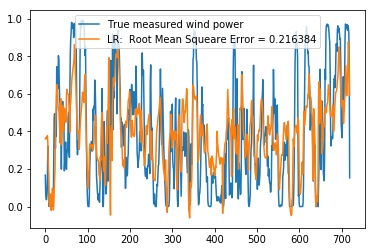

In [8]:
forecast('LR')

Training model: k-Nearest Neighbor 
Root Mean Squeare Error: 0.216335


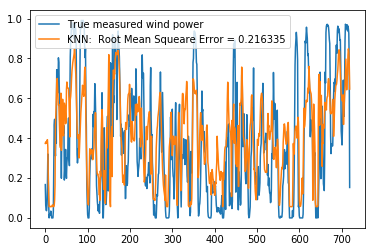

In [9]:
forecast('KNN')

Training model: Support Vector Regression 
Root Mean Squeare Error: 0.213763


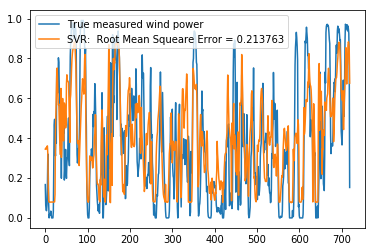

In [10]:
forecast('SVR')

Training model: Artificial Neural Network 
Root Mean Squeare Error: 0.216523


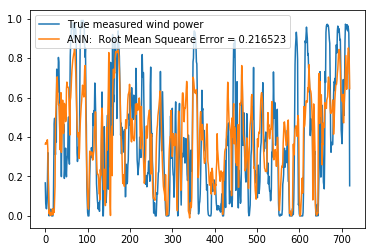

In [11]:
forecast('ANN')